In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter

In [142]:
# load data
master = pd.read_csv('../data/processed/master_data.csv', engine='pyarrow')
rfm = pd.read_csv('../data/processed/rfm_data.csv', engine='pyarrow')
guide = pd.read_excel('../data/additional/rfm-guide.xlsx').reset_index()
guide.rename(columns={'index':'level', 'Segment':'RFM_segment'}, inplace=True)

# merge data
data_segm = master.merge(rfm, on='customer_unique_id')
data_segm = data_segm.merge(guide, on='RFM_segment')

In [143]:
data_segm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107849 entries, 0 to 107848
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             107849 non-null  object        
 1   customer_id                    107849 non-null  object        
 2   customer_zip_code_prefix       107849 non-null  int64         
 3   customer_city                  107849 non-null  object        
 4   customer_state                 107849 non-null  object        
 5   order_id                       107849 non-null  object        
 6   order_status                   107849 non-null  object        
 7   order_purchase_timestamp       107849 non-null  datetime64[ns]
 8   order_approved_at              107694 non-null  datetime64[ns]
 9   order_delivered_carrier_date   105950 non-null  datetime64[ns]
 10  order_delivered_customer_date  104691 non-null  datetime64[ns]
 11  

In [144]:
guide = pd.read_excel('../data/additional/rfm-guide.xlsx').reset_index()
guide.rename(columns={'index':'level'}, inplace=True)

### **Data Analysis - Cluster**

#### **RFM**

In [154]:
eda_rfm = rfm.merge(guide, left_on='RFM_segment', right_on='Segment')

In [157]:
eda_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96090 entries, 0 to 96089
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  96090 non-null  object 
 1   recency             96090 non-null  int64  
 2   frequency           96090 non-null  int64  
 3   monetary            96090 non-null  float64
 4   R                   96090 non-null  int64  
 5   F                   96090 non-null  int64  
 6   M                   96090 non-null  int64  
 7   RFM                 96090 non-null  int64  
 8   RFM_segment         96090 non-null  object 
 9   level               96090 non-null  int64  
 10  Segment             96090 non-null  object 
 11  Activity            96090 non-null  object 
 12  Actionable Tip      96090 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 9.5+ MB


**Recency**

In [155]:
eda_rfm.groupby(['level','RFM_segment'])['recency'].describe()

,,count,mean,std,min,25%,50%,75%,max
level,RFM_segment,,,,,,,,
0,Champions,34.0,85.970588,54.560773,9.0,32.25,78.0,131.00,179.0
1,Loyal,69.0,175.521739,48.120134,99.0,135.00,172.0,213.00,271.0
2,Potential Loyalist,163.0,181.368098,54.960699,5.0,139.50,185.0,227.50,271.0
3,New Customers,18819.0,120.264573,71.603577,1.0,58.00,119.0,173.00,271.0
4,Promising,34332.0,135.120908,75.685285,2.0,70.00,135.0,198.00,271.0
5,Need Attention,545.0,205.133945,56.229265,4.0,192.00,214.0,236.00,271.0
6,About To Sleep,7421.0,272.790999,57.454640,182.0,223.00,272.0,319.00,387.0
7,Cannot Lose Them,17857.0,415.228146,94.815027,272.0,332.00,412.0,485.00,726.0
8,At Risk,800.0,385.676250,86.167860,272.0,315.75,370.0,446.25,694.0


**Frequency**

In [158]:
eda_rfm.groupby(['level','RFM_segment'])['frequency'].describe()

,,count,mean,std,min,25%,50%,75%,max
level,RFM_segment,,,,,,,,
0,Champions,34.0,4.970588,2.302637,4.0,4.0,4.0,5.0,17.0
1,Loyal,69.0,3.260870,0.994872,3.0,3.0,3.0,3.0,9.0
2,Potential Loyalist,163.0,2.042945,0.203357,2.0,2.0,2.0,2.0,3.0
3,New Customers,18819.0,1.002179,0.046626,1.0,1.0,1.0,1.0,2.0
4,Promising,34332.0,1.030642,0.172348,1.0,1.0,1.0,1.0,2.0
5,Need Attention,545.0,2.117431,0.322229,2.0,2.0,2.0,2.0,3.0
6,About To Sleep,7421.0,1.000943,0.030700,1.0,1.0,1.0,1.0,2.0
7,Cannot Lose Them,17857.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
8,At Risk,800.0,2.102500,0.356585,2.0,2.0,2.0,2.0,6.0


**Monetary**

In [159]:
eda_rfm.groupby(['level','RFM_segment'])['monetary'].describe()

,,count,mean,std,min,25%,50%,75%,max
level,RFM_segment,,,,,,,,
0,Champions,34.0,851.878235,777.029258,274.95,442.2750,655.005,910.2100,4655.91
1,Loyal,69.0,544.195507,363.971649,209.79,290.7300,421.320,671.4600,2164.40
2,Potential Loyalist,163.0,110.663742,13.771367,87.60,99.0700,109.930,124.6150,133.01
3,New Customers,18819.0,51.638277,17.805867,0.00,37.4600,49.450,66.0550,87.54
4,Promising,34332.0,235.166138,255.260407,35.94,118.8875,162.900,241.2775,7274.88
5,Need Attention,545.0,362.534220,467.505910,134.47,193.2700,267.600,390.0200,9553.02
6,About To Sleep,7421.0,89.670601,22.184917,36.74,69.7100,87.640,107.7800,133.20
7,Cannot Lose Them,17857.0,269.453423,306.921098,87.57,138.2600,182.590,281.5000,13664.08
8,At Risk,800.0,365.976850,423.097795,73.48,187.5800,260.795,401.0300,7571.63


#### **Customer Behaviour**

**Waktu Pembelian**

In [ ]:
data_segm['day_num'] = data_segm.order_purchase_timestamp.dt.weekday
data_segm['day_name'] = data_segm.order_purchase_timestamp.dt.strftime('%A')

In [ ]:
day = data_segm.groupby(['RFM_segment','level','day_num','day_name'])['customer_unique_id']\
    .nunique().reset_index()\
    .rename(columns={'customer_unique_id': 'n_customers','product_category_name_english':'product'})

day['proportion_n_cust'] = day.n_customers/day.groupby(['RFM_segment'])['n_customers'].transform(sum)*100

daypiv = day.pivot_table(index=['level','RFM_segment'], columns=['day_num','day_name'], values='proportion_n_cust').sort_index(level='level', ascending=False)

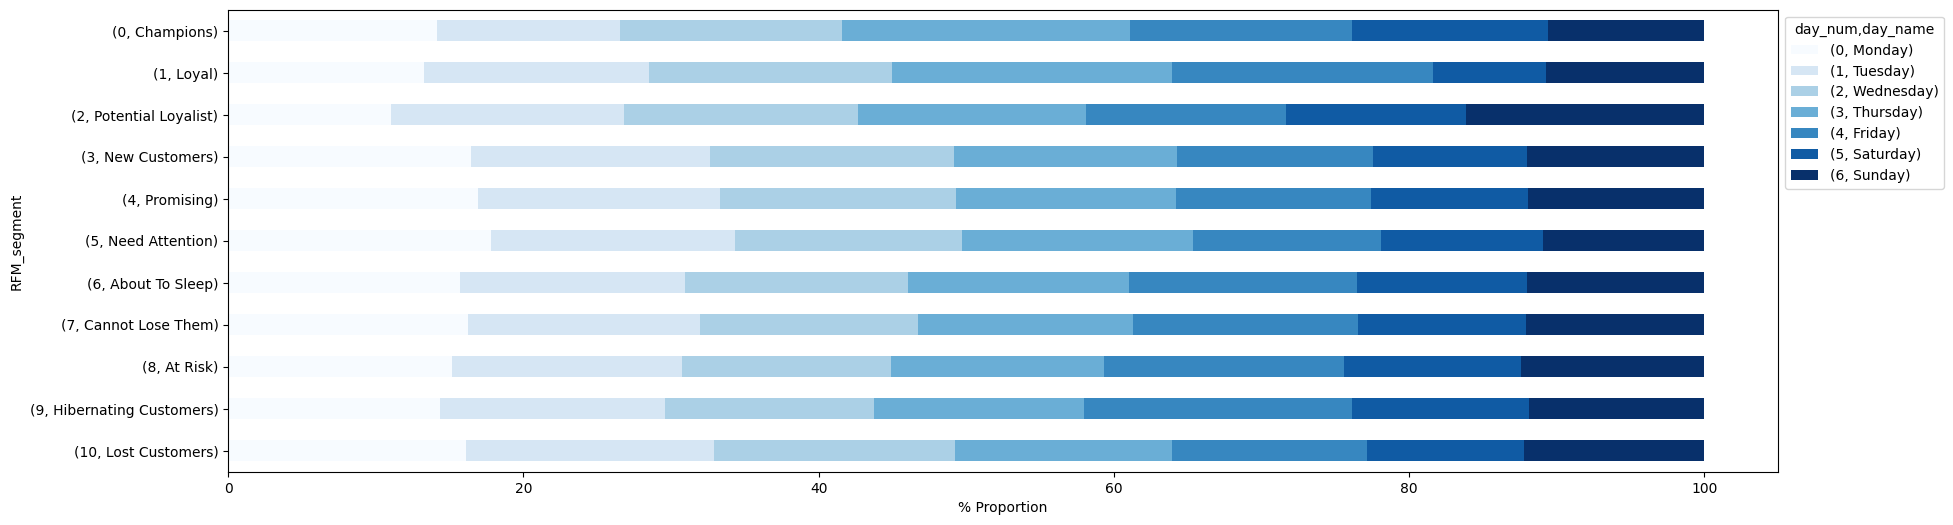

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
 
# drawing the plot
daypiv.plot(kind='barh',stacked=True, colormap='Blues',rot=90, ax=ax)

ax.tick_params(axis='y', rotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='% Proportion', ylabel='RFM_segment')

plt.show()

**Produk**

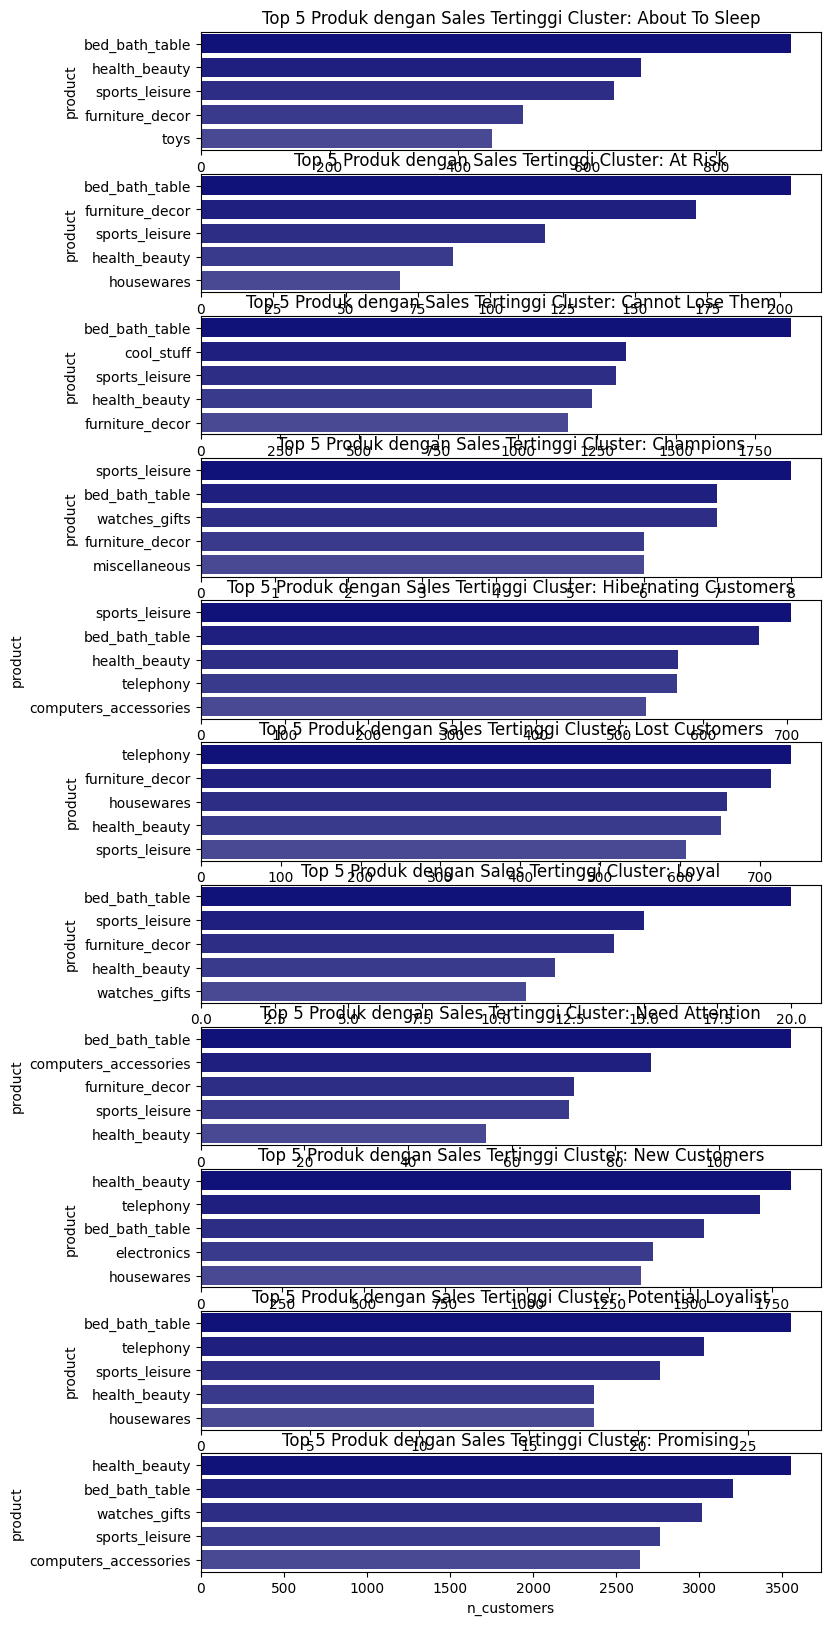

In [ ]:
prod = data_segm.groupby(['RFM_segment','product_category_name_english'])['customer_unique_id'].nunique().reset_index().rename(columns={'customer_unique_id': 'n_customers','product_category_name_english':'product'})

segm = prod.RFM_segment.unique()

# Viz
c1 = sns.blend_palette(['darkblue', 'lightgrey'], 15)
fig, axes = plt.subplots(len(segm),1, figsize=(8, 20))
for i, val in enumerate(segm):
    sns.barplot(data=prod.query(f"RFM_segment == '{val}'").nlargest(5, columns='n_customers'), x = 'n_customers', y='product', palette=c1, ax=axes[i])
    axes[i].title.set_text(f'Top 5 Produk dengan Sales Tertinggi Cluster: {val}')

# plt.show()